<h1 align=center > Titanic-Analysing and Predicting model</h1>

In [1]:
# import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder

In [2]:
df = pd.read_csv("Data/titanic.csv",usecols=['PassengerId', 'Survived', 'Pclass', 'Name', 'Gender', 'Age', 'SibSp','Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'])

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Dimension of data

In [4]:
df.shape

(891, 12)

### How Many Null Values?

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### What type of data is?

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Data Cleaning

In [7]:
df.drop(columns=['PassengerId','Name','Age','Cabin','Ticket'],inplace=True)

In [8]:
df.columns

Index(['Survived', 'Pclass', 'Gender', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

### Separate out Categorical and Numerical Features

In [9]:
cat_cols = df.select_dtypes(exclude=np.number).columns.to_list()
print("Categorical columns : ", cat_cols)

Categorical columns :  ['Gender', 'Embarked']


In [10]:
num_cols = df.select_dtypes(include=np.number).columns.to_list()
print("Numerical columns : ", num_cols)

Numerical columns :  ['Survived', 'Pclass', 'SibSp', 'Parch', 'Fare']


In [11]:
num_df = df[num_cols]
num_df.sample(5)

,Survived,Pclass,SibSp,Parch,Fare
666,0,2,0,0,13.0000
2,1,3,0,0,7.9250
670,1,2,1,1,39.0000
573,1,3,0,0,7.7500
299,1,1,0,1,247.5208


In [12]:
cat_df = df[cat_cols]
cat_df.sample(5)

,Gender,Embarked
417,female,S
296,male,C
837,male,S
592,male,S
490,male,S


In [13]:
df.dropna(inplace=True)

In [14]:
df.isnull().sum()

Survived    0
Pclass      0
Gender      0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [15]:
df.head()

,Survived,Pclass,Gender,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S


### Feature Extraction

In [16]:
df['Family_Size'] = df['SibSp'] + df['Parch'] + 1

In [17]:
df.drop(columns=['SibSp','Parch'],inplace=True)

In [18]:
df.head()

,Survived,Pclass,Gender,Fare,Embarked,Family_Size
0,0,3,male,7.2500,S,2
1,1,1,female,71.2833,C,2
2,1,3,female,7.9250,S,1
3,1,1,female,53.1000,S,2
4,0,3,male,8.0500,S,1


### UniVariant EDA

In [19]:
sns.set_context('paper', font_scale = 2)
sns.set_style('darkgrid')

In [20]:
cat_columns = ['Survived', 'Pclass', 'Gender','Embarked', 'Family_Size']

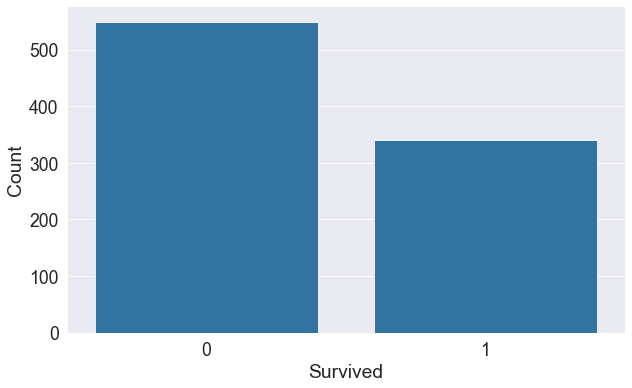

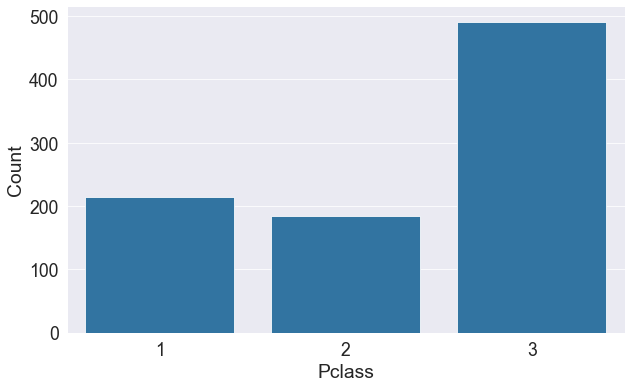

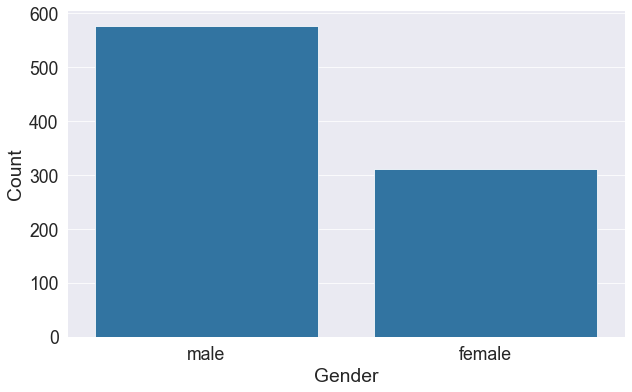

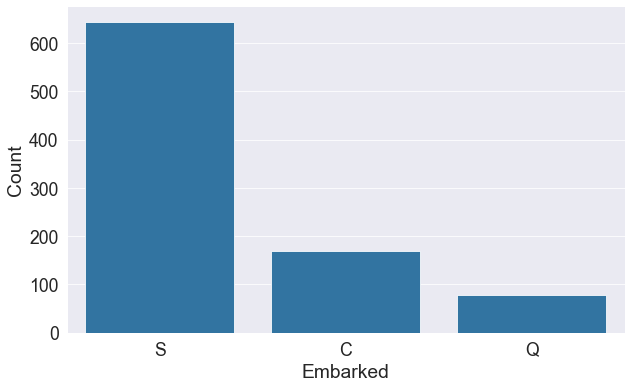

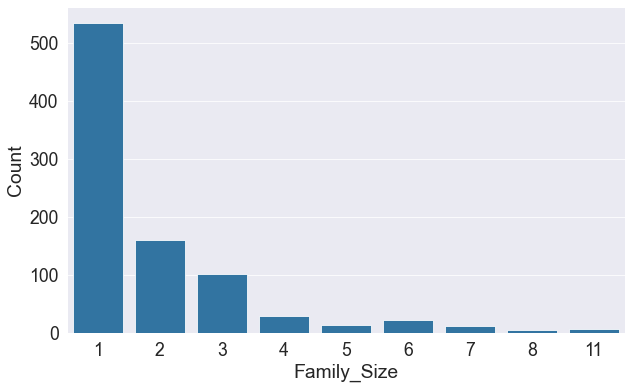

In [21]:
for row in range(len(cat_columns)):
    plt.figure(figsize=(10, 6))  
    sns.countplot(x=cat_columns[row], data=df)
    plt.xlabel(cat_columns[row])
    plt.ylabel('Count')
    
    title = cat_columns[row]
    save_path = f'C:\\Users\\LENOVO\\Desktop\\github_files\\Machine Learning Projects\\Classification\\Titanic-Predicting-model\\Uni Variate EDA\\{title}.png'
    
    plt.savefig(save_path)
    plt.show()


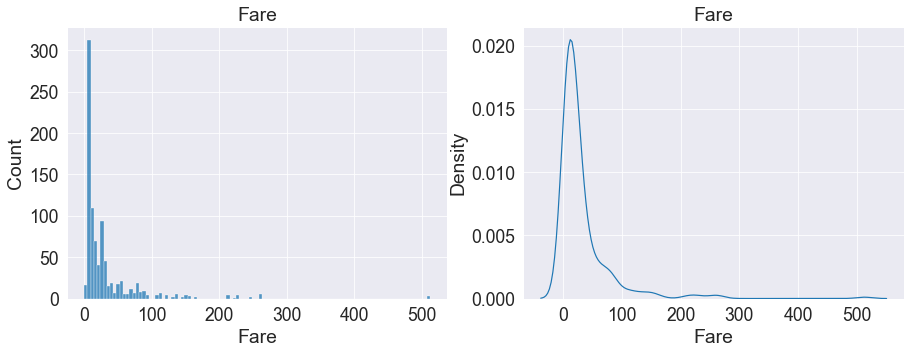

In [22]:
fig = plt.figure(figsize=(15,5))
(ax1,ax2) = fig.subplots(1,2)
sns.histplot(df['Fare'],ax=ax1)
ax1.set_title('Fare')

sns.kdeplot(df['Fare'],ax=ax2)
ax2.set_title('Fare');

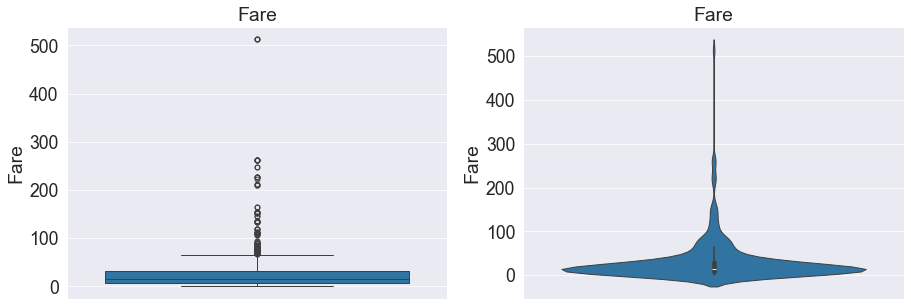

In [23]:
fig = plt.figure(figsize=(15,5))
(ax1,ax2) = fig.subplots(1,2)
sns.boxplot(df['Fare'],ax=ax1)
ax1.set_title('Fare')

sns.violinplot(df['Fare'],ax=ax2)
ax2.set_title('Fare');

In [24]:
iqr = df['Fare'].quantile(0.75) - df['Fare'].quantile(0.25)
upper_limit= df['Fare'].quantile(0.75) + iqr *1.5
df[df['Fare']>upper_limit].shape[0]

114

In [25]:
(df[df['Fare']>upper_limit].shape[0]/df.shape[0])*100

12.823397075365579

In [26]:
tmp = df['Fare']
df['Fare']= np.where(df['Fare'] >upper_limit,upper_limit,df['Fare'])

### After Removing Outliers 

In [27]:
df[df['Fare']>upper_limit].shape[0]

0

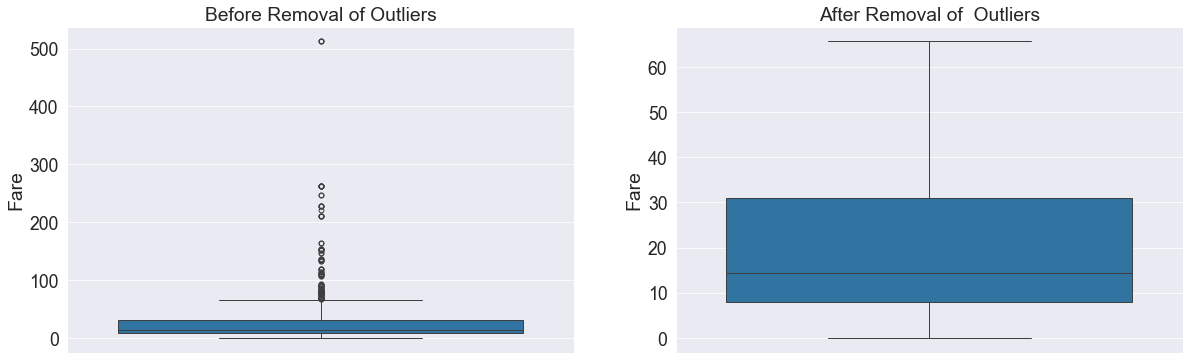

In [28]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
ax1.set_title('Before Removal of Outliers')
sns.boxplot(tmp,ax=ax1);
ax2.set_title('After Removal of  Outliers');
sns.boxplot(df['Fare'],ax=ax2);

### BiVariant EDA

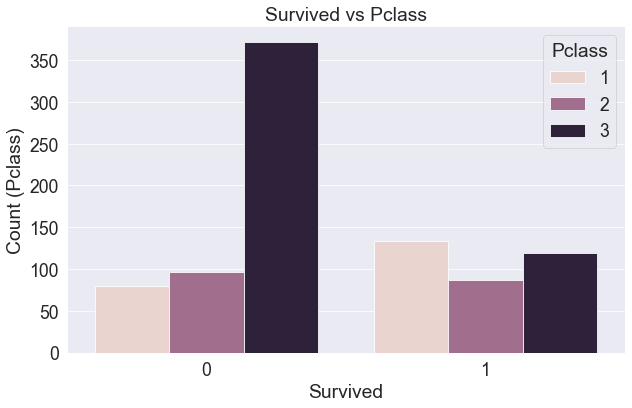

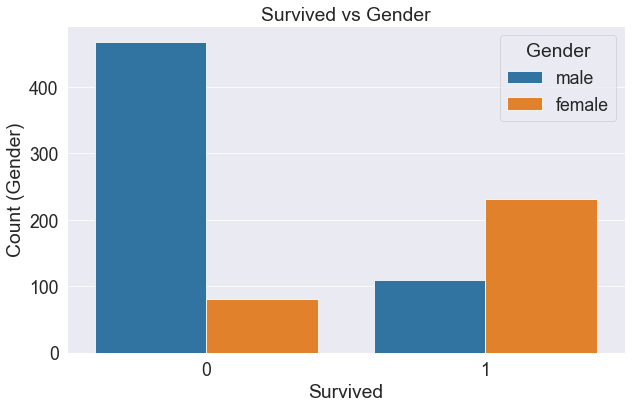

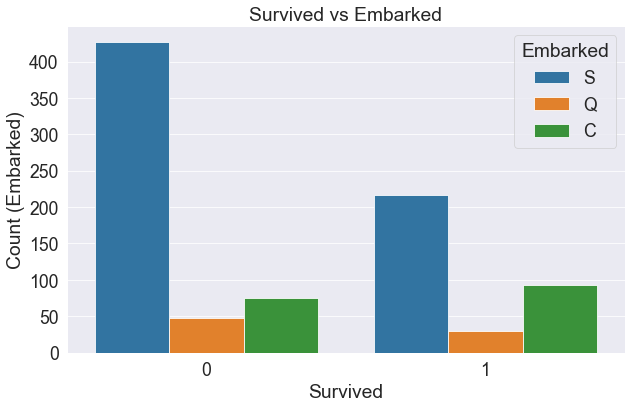

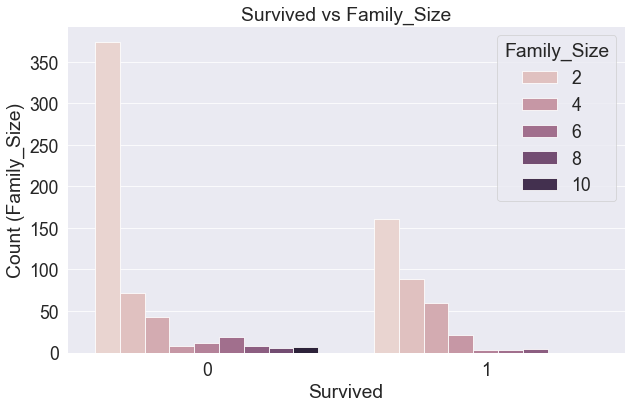

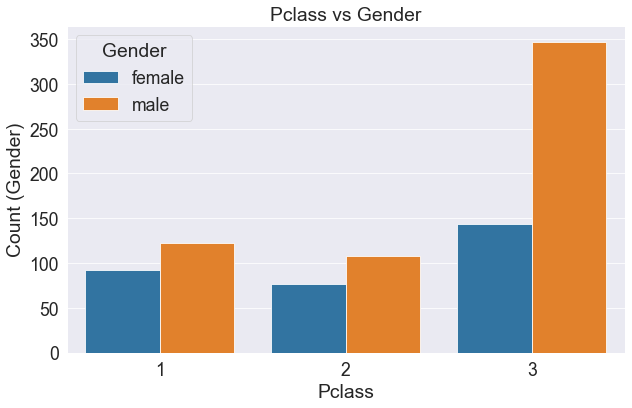

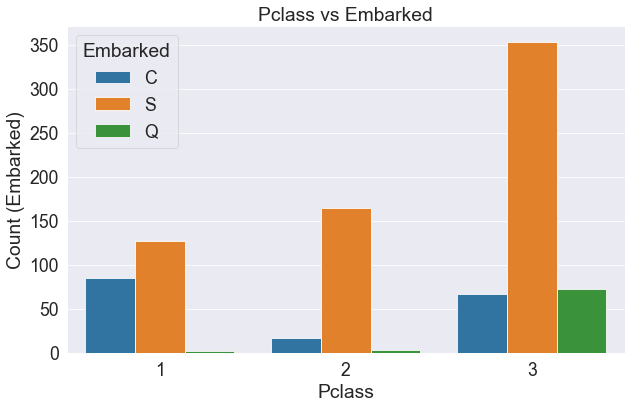

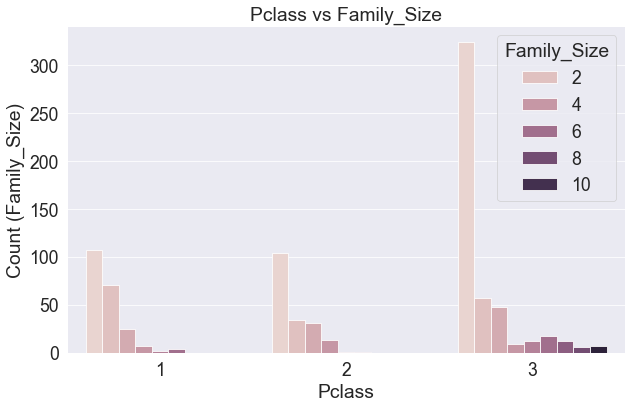

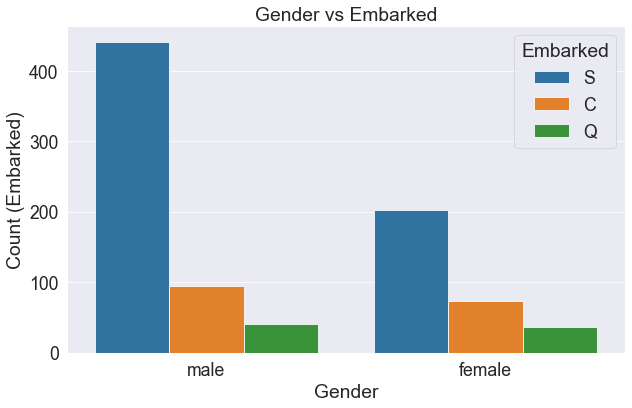

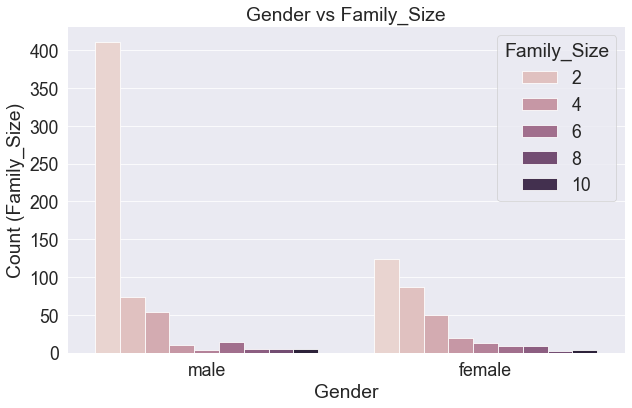

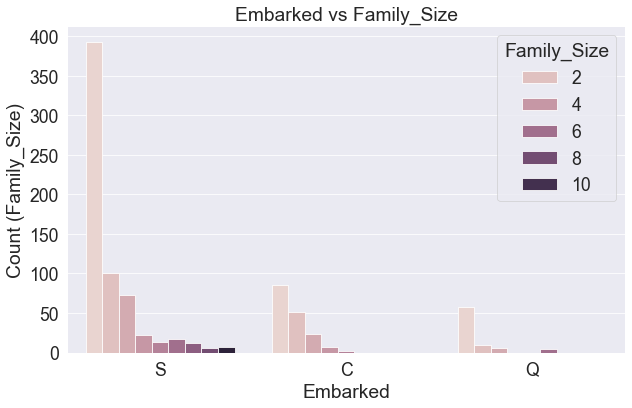

In [29]:
for row in range(len(cat_columns)-1):
    for col in range(row+1, len(cat_columns)):
        plt.figure(figsize=(10, 6))  
        sns.countplot(x=cat_columns[row], hue=cat_columns[col], data=df)
        plt.xlabel(cat_columns[row])
        plt.ylabel(f'Count ({cat_columns[col]})')
        title = f'{cat_columns[row]} vs {cat_columns[col]}'
        plt.title(title)
        save_path = f'C:\\Users\\LENOVO\\Desktop\\github_files\\Machine Learning Projects\\Classification\\Titanic-Predicting-model\\Bi Variate EDA\\{title}.png'
        plt.savefig(save_path)
        plt.legend(title=cat_columns[col])
        plt.show()


In [30]:
X = df.drop(columns=['Survived'])
y = df[['Survived']]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Building and Training

In [31]:
numeric_features = [2]
one_hot_features = [1] 
label_features = [3] 

In [32]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))
])

ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, one_hot_features),
        ('ord', ordinal_transformer, label_features)
    ])

# Full pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
])


In [33]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [2]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  [1]),
                                                 ('ord',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  [3])]))])

In [34]:
x_train = pipeline.transform(x_train)
x_train

array([[ 2.04865174,  0.        ,  2.        ],
       [-0.46516056,  0.        ,  0.        ],
       [-0.7857174 ,  1.        ,  2.        ],
       ...,
       [ 0.09821469,  0.        ,  2.        ],
       [ 0.5128687 ,  0.        ,  2.        ],
       [-0.74991668,  1.        ,  2.        ]])

In [35]:
x_test = pipeline.transform(x_test)
x_test

array([[-0.78919339,  1.        ,  2.        ],
       [ 2.04865174,  0.        ,  2.        ],
       [-0.62288109,  0.        ,  0.        ],
       [-0.5365558 ,  1.        ,  2.        ],
       [ 2.04865174,  0.        ,  2.        ],
       [-0.83235849,  1.        ,  2.        ],
       [-0.5365558 ,  1.        ,  2.        ],
       [-0.74950919,  1.        ,  2.        ],
       [ 2.04865174,  0.        ,  0.        ],
       [ 2.04865174,  0.        ,  0.        ],
       [ 0.10169068,  1.        ,  2.        ],
       [-0.39663253,  0.        ,  2.        ],
       [-0.8284701 ,  1.        ,  2.        ],
       [-0.46516056,  1.        ,  0.        ],
       [-0.70921129,  1.        ,  2.        ],
       [-0.06891751,  1.        ,  2.        ],
       [ 2.04865174,  1.        ,  0.        ],
       [-0.81987832,  1.        ,  0.        ],
       [ 0.64195159,  1.        ,  0.        ],
       [-0.787151  ,  1.        ,  2.        ],
       [ 1.12779463,  0.        ,  2.   

In [36]:
df.isnull().sum()

Survived       0
Pclass         0
Gender         0
Fare           0
Embarked       0
Family_Size    0
dtype: int64

In [37]:
model = GaussianNB()

In [38]:
model.fit(x_train, y_train)

C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [39]:
y_pred = model.predict(x_test)

In [40]:
y_pred

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1], dtype=int64)

### Evaluating the model

In [41]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.78


In [42]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))

### Displaying the evaluation metrics

In [43]:
cm

,0,1
0,84,25
1,14,55


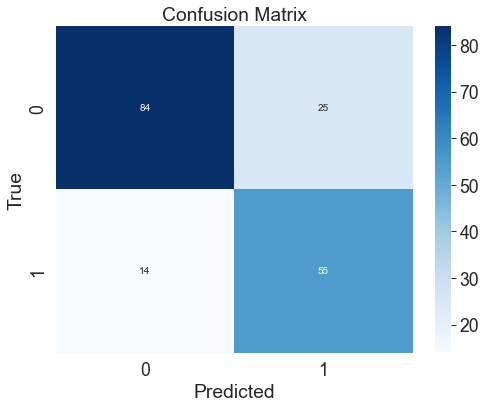

In [44]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [46]:
estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=10)),
    ('gbdt',GradientBoostingClassifier())
]

In [47]:
from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(
    estimators=estimators, 
    final_estimator=LogisticRegression(),
    cv=10
)

In [48]:
clf.fit(x_train, y_train)

C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


StackingClassifier(cv=10,
                   estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('knn', KNeighborsClassifier(n_neighbors=10)),
                               ('gbdt', GradientBoostingClassifier())],
                   final_estimator=LogisticRegression())

In [49]:
y_pred = clf.predict(x_test)

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7752808988764045

In [51]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))

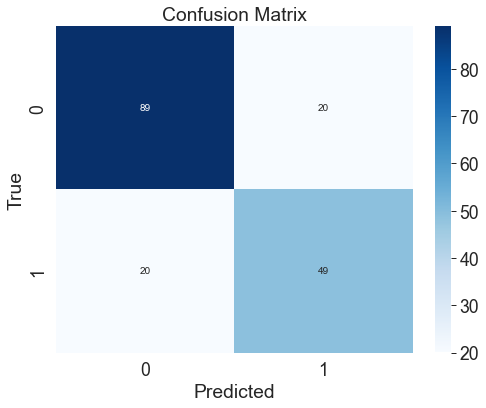

In [52]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Model Optimization By RandomSearch and GridSearch

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
X = df.drop(columns=['Survived'])
y = df[['Survived']]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features = [2]
one_hot_features = [1] 
label_features = [3] 
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))
])

ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, one_hot_features),
        ('ord', ordinal_transformer, label_features)
    ])

nb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])

dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Define hyperparameters to tune
nb_param_grid = {
    'classifier__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

dt_param_grid = {
    'classifier__max_depth': [None, 5, 10, 15],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

nb_grid_search = GridSearchCV(nb_pipeline, nb_param_grid, cv=5, scoring='accuracy')
nb_grid_search.fit(x_train, y_train)

dt_grid_search = GridSearchCV(dt_pipeline, dt_param_grid, cv=5, scoring='accuracy')
dt_grid_search.fit(x_train, y_train)

print("Best hyperparameters for Naive Bayes:")
print(nb_grid_search.best_params_)

print("\nBest hyperparameters for Decision Tree:")
print(dt_grid_search.best_params_)

nb_predictions = nb_grid_search.predict(x_test)
dt_predictions = dt_grid_search.predict(x_test)

nb_accuracy = accuracy_score(y_test, nb_predictions)
dt_accuracy = accuracy_score(y_test, dt_predictions)

print(f'\nAccuracy for Naive Bayes: {nb_accuracy:.2f}')
print(f'Accuracy for Decision Tree: {dt_accuracy:.2f}')


C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was 

Best hyperparameters for Naive Bayes:
{'classifier__var_smoothing': 1e-09}

Best hyperparameters for Decision Tree:
{'classifier__max_depth': 10, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2}

Accuracy for Naive Bayes: 0.78
Accuracy for Decision Tree: 0.76


In [54]:
print("Best hyperparameters for Naive Bayes:")
print(nb_grid_search.best_params_)


print("\nBest hyperparameters for Decision Tree:")
print(dt_grid_search.best_params_)

print(f'\nAccuracy for Naive Bayes: {nb_accuracy:.2f}')
print(f'Accuracy for Decision Tree: {dt_accuracy:.2f}')

Best hyperparameters for Naive Bayes:
{'classifier__var_smoothing': 1e-09}

Best hyperparameters for Decision Tree:
{'classifier__max_depth': 10, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2}

Accuracy for Naive Bayes: 0.78
Accuracy for Decision Tree: 0.76


In [55]:
np.linspace(0.001,1,30)

array([0.001     , 0.03544828, 0.06989655, 0.10434483, 0.1387931 ,
       0.17324138, 0.20768966, 0.24213793, 0.27658621, 0.31103448,
       0.34548276, 0.37993103, 0.41437931, 0.44882759, 0.48327586,
       0.51772414, 0.55217241, 0.58662069, 0.62106897, 0.65551724,
       0.68996552, 0.72441379, 0.75886207, 0.79331034, 0.82775862,
       0.8622069 , 0.89665517, 0.93110345, 0.96555172, 1.        ])

In [56]:
X = df.drop(columns=['Survived'])
y = df[['Survived']]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features = [2]
one_hot_features = [1] 
label_features = [3] 
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))
])

ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, one_hot_features),
        ('ord', ordinal_transformer, label_features)
    ])

nb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])

dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

nb_param_grid = {
    'classifier__var_smoothing': np.linspace(0.001,1,50)
}

dt_param_grid = {
    'classifier__max_depth': [None, 5, 10, 15],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

nb_grid_search = RandomizedSearchCV(nb_pipeline, nb_param_grid, cv=5, scoring='accuracy')
nb_grid_search.fit(x_train, y_train)

dt_grid_search = RandomizedSearchCV(dt_pipeline, dt_param_grid, cv=5, scoring='accuracy')
dt_grid_search.fit(x_train, y_train)


nb_predictions = nb_grid_search.predict(x_test)
dt_predictions = dt_grid_search.predict(x_test)

nb_accuracy = accuracy_score(y_test, nb_predictions)
dt_accuracy = accuracy_score(y_test, dt_predictions)



C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was 

C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was 

In [57]:
print("Best hyperparameters for Naive Bayes:")
print(nb_grid_search.best_params_)


print("\nBest hyperparameters for Decision Tree:")
print(dt_grid_search.best_params_)

print(f'\nAccuracy for Naive Bayes: {nb_accuracy:.2f}')
print(f'Accuracy for Decision Tree: {dt_accuracy:.2f}')

Best hyperparameters for Naive Bayes:
{'classifier__var_smoothing': 0.001}

Best hyperparameters for Decision Tree:
{'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 2, 'classifier__max_depth': 10}

Accuracy for Naive Bayes: 0.78
Accuracy for Decision Tree: 0.76


### Feature Engineering PipeLine

In [58]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))
])

ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, one_hot_features),
        ('ord', ordinal_transformer, label_features)
    ])

# Full pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])


In [59]:
df.head(1)

,Survived,Pclass,Gender,Fare,Embarked,Family_Size
0,0,3,male,7.25,S,2


In [60]:
pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)

C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [61]:
test_input2 = np.array([3, 'female',7, 'S',3],dtype=object).reshape(1,5)

In [62]:
pipeline.predict(test_input2)

C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


array([1], dtype=int64)